<a href="https://colab.research.google.com/github/varshaa-118/credit-card-fraud-prediction/blob/main/credits_card.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [28]:
train_data = pd.read_csv('/content/drive/MyDrive/credit card fraud/fraudTrain.csv')

# Load the testing dataset
test = pd.read_csv('/content/drive/MyDrive/credit card fraud/fraudTest.csv')

# Display the first few rows of both datasets
print("First 5 rows of the training dataset:")
print(train_data.head())

print("\nFirst 5 rows of the testing dataset:")
print(test_data.head())

First 5 rows of the training dataset:
   Unnamed: 0 trans_date_trans_time            cc_num  \
0           0   2019-01-01 00:00:18  2703186189652095   
1           1   2019-01-01 00:00:44      630423337322   
2           2   2019-01-01 00:00:51    38859492057661   
3           3   2019-01-01 00:01:16  3534093764340240   
4           4   2019-01-01 00:03:06   375534208663984   

                             merchant       category     amt      first  \
0          fraud_Rippin, Kub and Mann       misc_net    4.97   Jennifer   
1     fraud_Heller, Gutmann and Zieme    grocery_pos  107.23  Stephanie   
2                fraud_Lind-Buckridge  entertainment  220.11     Edward   
3  fraud_Kutch, Hermiston and Farrell  gas_transport   45.00     Jeremy   
4                 fraud_Keeling-Crist       misc_pos   41.96      Tyler   

      last gender                        street  ...      lat      long  \
0    Banks      F                561 Perry Cove  ...  36.0788  -81.1781   
1     Gill      F 


Missing values in the training dataset:
Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

Summary statistics for numeric columns in the training dataset:
         Unnamed: 0        cc_num           amt           zip           lat  \
count  1.296675e+06  1.296675e+06  1.296675e+06  1.296675e+06  1.296675e+06   
mean   6.483370e+05  4.171920e+17  7.035104e+01  4.880067e+04  3.853762e+01   
std    3.743180e+05  1.

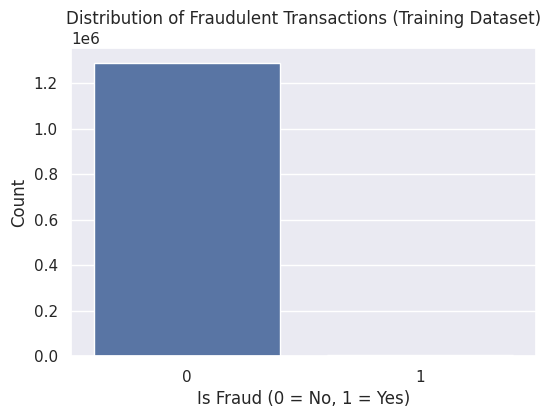

In [30]:
print("\nMissing values in the training dataset:")
print(train_data.isnull().sum())

# Summary statistics for numeric columns
print("\nSummary statistics for numeric columns in the training dataset:")
print(train_data.describe())

# Distribution of the target variable ('is_fraud') in the training dataset
plt.figure(figsize=(6, 4))
sns.countplot(x='is_fraud', data=train_data)
plt.title('Distribution of Fraudulent Transactions (Training Dataset)')
plt.xlabel('Is Fraud (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

In [31]:
train_data.drop(axis=1, columns = ["Unnamed: 0", "cc_num", "zip", "lat", "long", "city_pop", "unix_time", "merch_lat", "merch_long"], inplace=True)
train_data.drop(axis=1, columns=["trans_num", "street", "first", "last"], inplace=True)
fraud = train_data[train_data.is_fraud == 1]
not_fraud = train_data[train_data.is_fraud == 0]

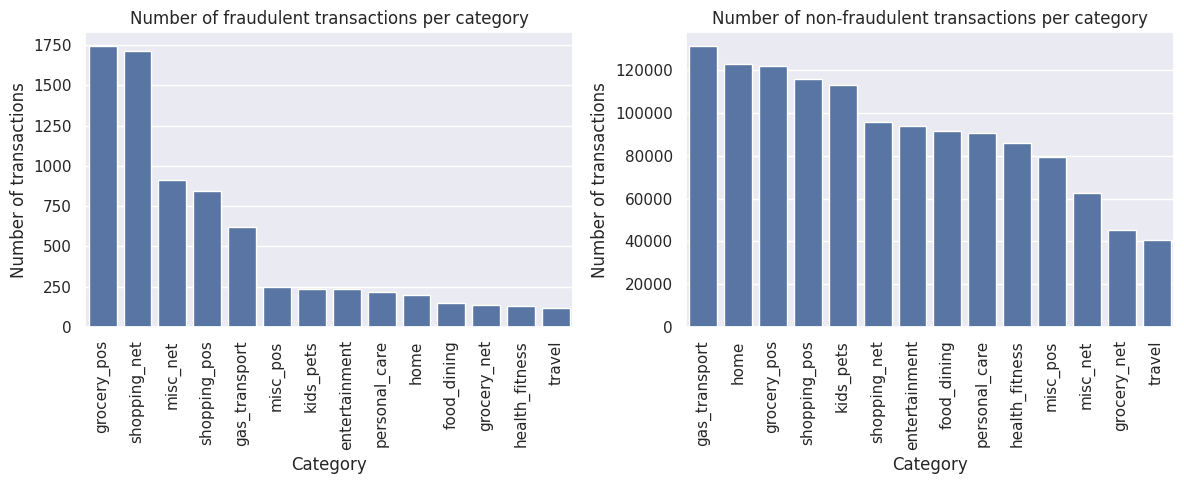

In [32]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.set_theme()

# Getting the counts of fraudulent and non-fraudulent activities per category
cat_fraud = fraud.category.value_counts().reset_index()
cat_fraud.columns = ["Category", "Counts"]
cat_not_fraud = not_fraud.category.value_counts().reset_index()
cat_not_fraud.columns = ["Category", "Counts"]

# Plotting the number of fraudulent and non-fraudulent transactions per category
sns.barplot(x="Category", y="Counts", data=cat_fraud, ax=axes[0])
axes[0].set_title("Number of fraudulent transactions per category")
axes[0].set_xlabel("Category")
axes[0].set_ylabel("Number of transactions")
axes[0].tick_params(axis="x", rotation=90)

sns.barplot(x="Category", y="Counts", data=cat_not_fraud, ax=axes[1])
axes[1].set_title("Number of non-fraudulent transactions per category")
axes[1].set_xlabel("Category")
axes[1].set_ylabel("Number of transactions")
axes[1].tick_params(axis="x", rotation=90)

plt.tight_layout()

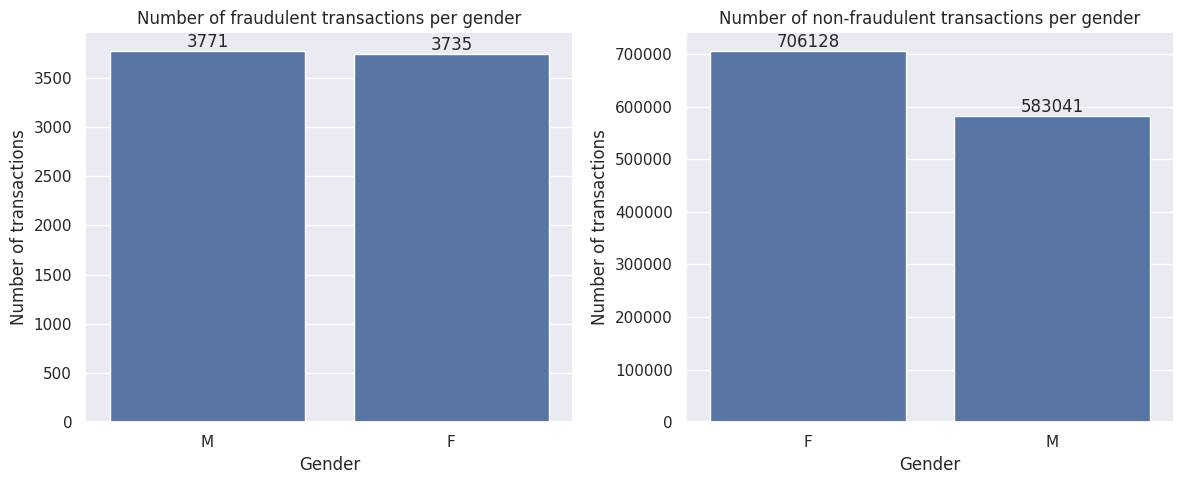

In [33]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.set_theme()

# Getting the counts of fraudulent and non-fraudulent activities per gender
g_fraud = fraud.gender.value_counts().reset_index()
g_fraud.columns = ["Gender", "Counts"]
g_not_fraud = not_fraud.gender.value_counts().reset_index()
g_not_fraud.columns = ["Gender", "Counts"]

# Plotting the number of fraudulent and non-fraudulent transactions per gender
sns.barplot(x="Gender", y="Counts", data=g_fraud, ax=axes[0])
axes[0].set_title("Number of fraudulent transactions per gender")
axes[0].set_xlabel("Gender")
axes[0].set_ylabel("Number of transactions")
axes[0].bar_label(axes[0].containers[0])

sns.barplot(x="Gender", y="Counts", data=g_not_fraud, ax=axes[1])
axes[1].set_title("Number of non-fraudulent transactions per gender")
axes[1].set_xlabel("Gender")
axes[1].set_ylabel("Number of transactions")
axes[1].bar_label(axes[1].containers[0])

plt.tight_layout()

In [34]:
# Extracting the transaction year
train_data["trans_year"] = pd.Series(pd.to_datetime(train_data.trans_date_trans_time)).dt.year
# Finding the birth year of each person
train_data["dob"] = pd.Series(pd.to_datetime(train_data.dob)).dt.year

In [35]:
age = pd.Series(train_data.trans_year - train_data.dob)
train_data["age"] = age
bins = [10, 18, 35, 60, 100]
labels = ["14-18", "18-35", "35-60", "60+"]
train_data["age_group"] = pd.cut(train_data['age'], bins=bins, labels=labels, right=True)
# Dropping age, trans_year and dob columns
train_data.drop(axis=1, columns=["age", "dob", "trans_year", "trans_date_trans_time"], inplace=True)


In [36]:
# Extracting fraudulent and non-fraudulent transactions by age_group
age_fraud = train_data[train_data.is_fraud == 1].age_group.value_counts().reset_index()
age_fraud.columns = ["Age group", "Counts"]
age_not_fraud = train_data[train_data.is_fraud == 0].age_group.value_counts().reset_index()
age_not_fraud.columns = ["Age group", "Counts"]

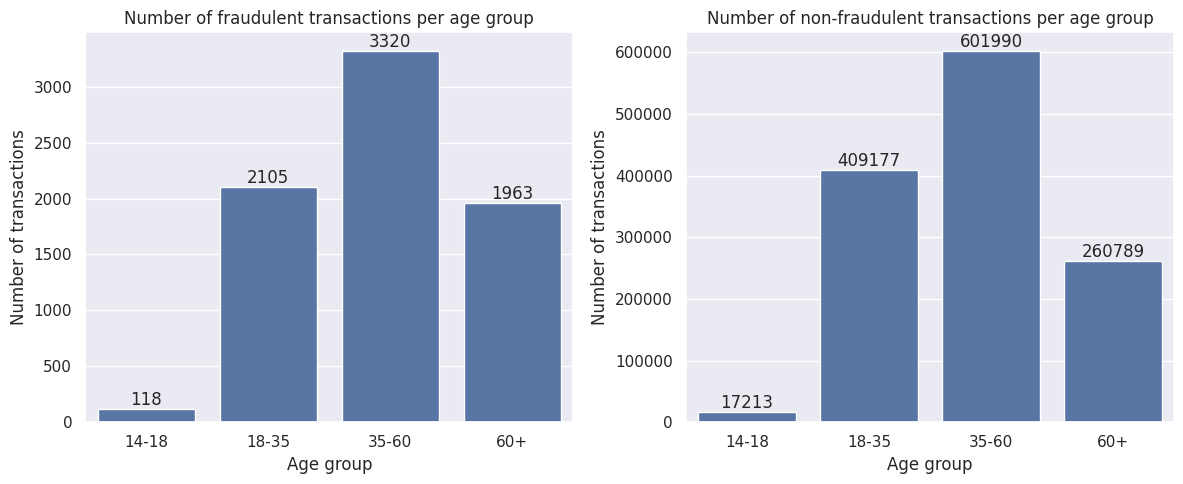

In [37]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.set_theme()

# Plotting the number of fraudulent and non-fraudulent transactions per gender
sns.barplot(x="Age group", y="Counts", data=age_fraud, ax=axes[0])
axes[0].set_title("Number of fraudulent transactions per age group")
axes[0].set_xlabel("Age group")
axes[0].set_ylabel("Number of transactions")
axes[0].bar_label(axes[0].containers[0])

sns.barplot(x="Age group", y="Counts", data=age_not_fraud, ax=axes[1])
axes[1].set_title("Number of non-fraudulent transactions per age group")
axes[1].set_xlabel("Age group")
axes[1].set_ylabel("Number of transactions")
axes[1].bar_label(axes[1].containers[0])

plt.tight_layout()

In [38]:
state_to_region = {
    'ME': 'Northeast', 'NH': 'Northeast', 'VT': 'Northeast',
    'MA': 'Northeast', 'RI': 'Northeast', 'CT': 'Northeast',
    'NY': 'Northeast', 'NJ': 'Northeast', 'PA': 'Northeast',
    'OH': 'Midwest', 'IN': 'Midwest', 'IL': 'Midwest', 'MI': 'Midwest',
    'WI': 'Midwest', 'MN': 'Midwest', 'IA': 'Midwest', 'MO': 'Midwest',
    'ND': 'Midwest', 'SD': 'Midwest', 'NE': 'Midwest', 'KS': 'Midwest',
    'DE': 'South', 'MD': 'South', 'DC': 'South', 'VA': 'South',
    'WV': 'South', 'NC': 'South', 'SC': 'South',
    'GA': 'South', 'FL': 'South', 'AL': 'South', 'MS': 'South',
    'TN': 'South', 'KY': 'South', 'AR': 'South', 'LA': 'South',
    'OK': 'South', 'TX': 'South', 'MT': 'Rocky Mountains', 'WY': 'Rocky Mountains',
    'CO': 'Rocky Mountains', 'NM': 'Rocky Mountains', 'ID': 'Rocky Mountains',
    'UT': 'Rocky Mountains', 'WA': 'Far West', 'OR': 'Far West',
    'CA': 'Far West', 'HI': 'Far West', 'AK': 'Far West'
}

train_data["Region"] = train_data.state.map(state_to_region)

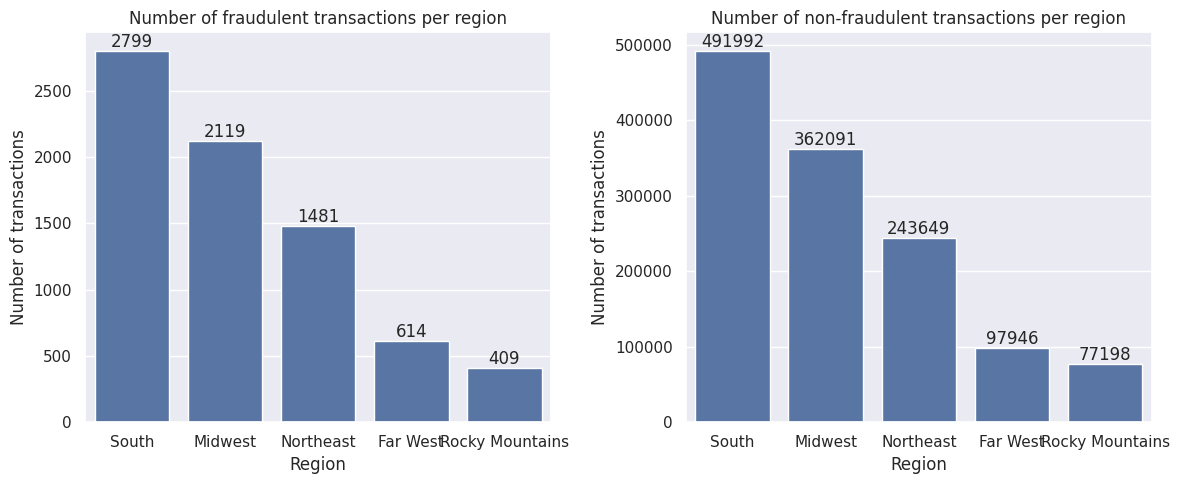

In [39]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.set_theme()

# Extracting fraudulent and non-fraudulent transactions by region
r_fraud = train_data[train_data.is_fraud == 1].Region.value_counts().reset_index()
r_fraud.columns = ["Region", "Counts"]
r_not_fraud = train_data[train_data.is_fraud == 0].Region.value_counts().reset_index()
r_not_fraud.columns = ["Region", "Counts"]

# Plotting the number of fraudulent and non-fraudulent transactions per gender
sns.barplot(x="Region", y="Counts", data=r_fraud, ax=axes[0])
axes[0].set_title("Number of fraudulent transactions per region")
axes[0].set_xlabel("Region")
axes[0].set_ylabel("Number of transactions")
axes[0].bar_label(axes[0].containers[0])

sns.barplot(x="Region", y="Counts", data=r_not_fraud, ax=axes[1])
axes[1].set_title("Number of non-fraudulent transactions per region")
axes[1].set_xlabel("Region")
axes[1].set_ylabel("Number of transactions")
axes[1].bar_label(axes[1].containers[0])

plt.tight_layout()

In [40]:
train_data.drop(axis=1, columns=["job", "merchant"], inplace=True)

Logistic Regression

In [41]:
train_data = pd.get_dummies(train_data, columns = ["category", "gender", "Region", "age_group"], drop_first=True)
train_data.drop(axis=1, columns=["city", "state"], inplace=True)
features = train_data.drop(axis=1, columns=["is_fraud"], inplace=False)
label = train_data["is_fraud"]
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
log_model = LogisticRegression(penalty="l2", fit_intercept=False, random_state=42)
log_model.fit(features, label)
test.drop(axis=1, columns=["Unnamed: 0", "cc_num", "merchant", "first", "last", "street", "city", "zip", "lat", "long", "city_pop", "job", "trans_num", "unix_time", "merch_lat", "merch_long"], inplace=True)
test["Region"] = test.state.map(state_to_region)
test["trans_year"] = pd.Series(pd.to_datetime(test.trans_date_trans_time)).dt.year
test["dob"] = pd.Series(pd.to_datetime(test.dob)).dt.year

age = pd.Series(test.trans_year - test.dob)
test["age"] = age

bins = [10, 18, 35, 60, 100]
labels = ["14-18", "18-35", "35-60", "60+"]
test["age_group"] = pd.cut(test['age'], bins=bins, labels=labels, right=True)
# Dropping all remaining redundant columns
test.drop(axis=1, columns=["dob", "trans_year", "trans_date_trans_time", "age", "state"], inplace=True)
# One hot encoding
test = pd.get_dummies(test, columns=["category", "gender", "Region", "age_group"], drop_first=True)
# Extracting features and label from test data
test_f = test.drop(axis=1, columns=["is_fraud"], inplace=False)
test_l = test["is_fraud"]

pred = log_model.predict(test_f)
# Accuracy score
accuracy = accuracy_score(test_l, pred)
accuracy

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.995589497569815

In [42]:
# Adding predictions to dataset
test["predictions"] = pred

# Comparing the number of fraudulent transactions in the dataset and the number of such transactions predicted by the model
actual_fraud = test.is_fraud.value_counts()[1]
pred_fraud = test[test.is_fraud == 1].predictions.value_counts()[1]

actual_fraud, pred_fraud

(np.int64(2145), np.int64(7))

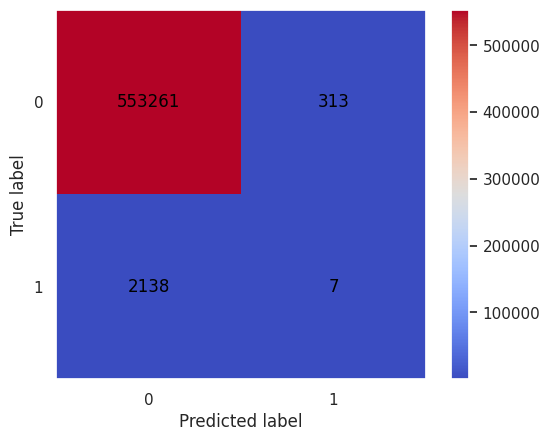

In [43]:
cm = confusion_matrix(test_l, pred)
matrix = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=log_model.classes_)
matrix.plot(cmap="coolwarm")
for text in matrix.text_.ravel():
    text.set_color("black")
plt.grid(False)
plt.show()

In [44]:
model2 = LogisticRegression(penalty="l2", fit_intercept=False, random_state=42, class_weight="balanced")
model2.fit(features, label)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(class_weight='balanced', fit_intercept=False,
                   random_state=42)

In [45]:
pred2 = model2.predict(test_f)
accuracy2 = accuracy_score(test_l, pred2)
accuracy2

0.858955695234462

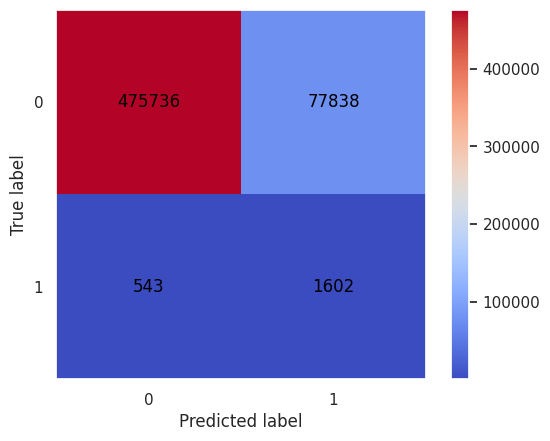

In [46]:
cm2 = confusion_matrix(test_l, pred2)
matrix2 = ConfusionMatrixDisplay(confusion_matrix=cm2, display_labels=model2.classes_)
matrix2.plot(cmap="coolwarm")
for text in matrix2.text_.ravel():
    text.set_color("black")
plt.grid(False)
plt.show()

Random Forest

In [47]:
# Import relevant function
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(class_weight="balanced", random_state=42)
rf.fit(features, label)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [48]:
rf_pred = rf.predict(test_f)
accuracy = accuracy_score(test_l, rf_pred)
accuracy

0.9963506736318175

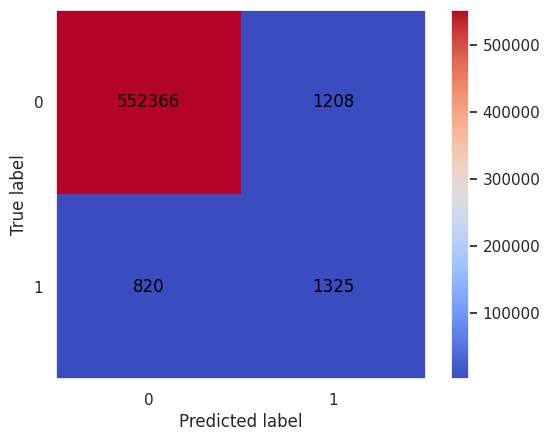

In [49]:
rf_cm = confusion_matrix(test_l, rf_pred)
rf_mat = ConfusionMatrixDisplay(confusion_matrix=rf_cm, display_labels=rf.classes_)
rf_mat.plot(cmap="coolwarm")
for text in rf_mat.text_.ravel():
    text.set_color("black")
plt.grid(False)
plt.show()

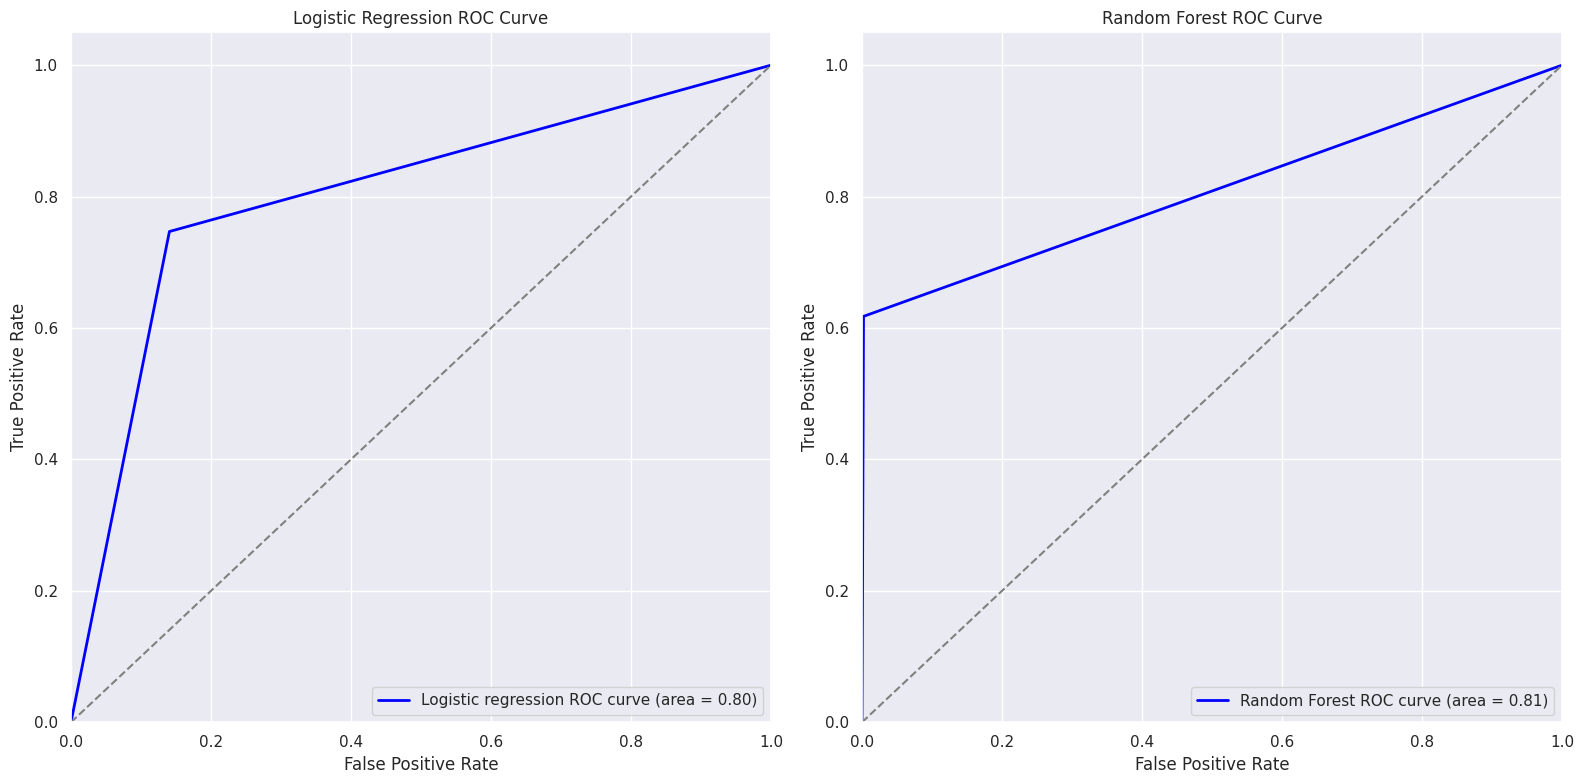

In [50]:
from sklearn.metrics import roc_curve, auc

# ROC Curve
fpr_log, tpr_log, roc_thresholds_log = roc_curve(test_l, pred2)
roc_auc_log = auc(fpr_log, tpr_log)

fpr_rf, tpr_rf, roc_thresholds_rf = roc_curve(test_l, rf_pred)
roc_auc_rf = auc(fpr_rf, tpr_rf)

plt.figure(figsize=(16,8))

plt.subplot(1,2,1)
plt.plot(fpr_log, tpr_log, color='blue', lw=2, label='Logistic regression ROC curve (area = %0.2f)' % roc_auc_log)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.legend(loc='lower right')

# Plot Precision-Recall Curve
plt.subplot(1, 2, 2)
plt.plot(fpr_rf, tpr_rf, color='blue', lw=2, label='Random Forest ROC curve (area = %0.2f)' % roc_auc_rf)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve')
plt.legend(loc='lower right')

plt.tight_layout()
plt.show()